In [3]:
import kaggle
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

# Downloading the dataset

The dataset is uploaded in Kaggle as an hdf5 file. The following code creates a data folder and stores the data file there. 

Make sure you have your Kaggle API token properly configured. If you don't have any prior experience with Kaggle's API, please check the following tutorial: https://www.kaggle.com/getting-started/524433

In [4]:
kaggle.api.authenticate()
os.makedirs('data', exist_ok=True)
kaggle.api.dataset_download_files('jgbeniqu/birdpics-spanish-migratory-bird-image-dataset', path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/jgbeniqu/birdpics-spanish-migratory-bird-image-dataset


# Loading and understanding the dataset

We use the h5py package to load the dataset:

In [4]:
f = h5py.File('data/bird_data.hdf5', 'r')
print("Keys: %s" % f.keys())

Keys: <KeysViewHDF5 ['test', 'train', 'val']>


As we can see, there are three main groups in the dataset, corresponding to the training ('train'), validation ('val') and testing ('test') sets.

In [5]:
f_train = f['train']
print("Keys: %s" % f_train.keys())

Keys: <KeysViewHDF5 ['X', 'Y', 'net_agreements']>


In [26]:
X_train, Y_train = f_train['X'], f_train['Y']
agree_train = f_train['net_agreements']
print("Training data shape: ", X_train.shape)
print("Training labels shape: ", Y_train.shape)
print("Training agreements shape: ", agree_train.shape)

Training data shape:  (19920, 224, 224, 3)
Training labels shape:  (19920,)
Training agreements shape:  (19920,)


In [27]:
Y_train = np.array([y.decode('utf-8') for y in Y_train])
print(Y_train[0:10])

['golondrina' 'golondrina' 'golondrina' 'avion' 'vencejo' 'avion' 'avion'
 'golondrina' 'avion' 'vencejo']


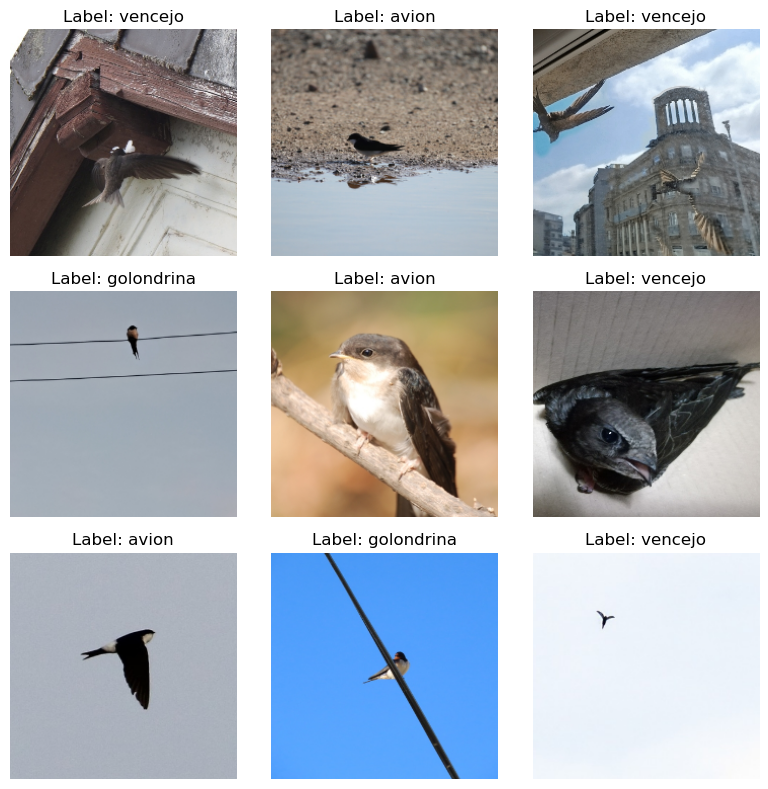

In [28]:
seed = 0
np.random.seed(seed)
random_sample = np.random.choice(X_train.shape[0], size=9, replace=False)
fig,ax = plt.subplots(3, 3, figsize=(8, 8))
for i, idx in enumerate(random_sample):
    ax[i // 3, i % 3].imshow(X_train[idx])
    ax[i // 3, i % 3].set_title(f"Label: {Y_train[idx]}")
    ax[i // 3, i % 3].axis('off')
plt.tight_layout()
plt.show()